In [10]:
from utility import *
from data import *

In [11]:
with open('config.txt', 'r') as f:
        config = dict(line.strip().split('=') for line in f)

url = config['url']
path = config['path']


#print(url)
#print(path)
#url="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip"
#DATASET_PATH = 'data/mini_speech_commands'
#data_dir = pathlib.Path(DATASET_PATH)

foo = Datasetmanager(path)
foo.getdata(url)
foo.prepdata()
foo.getlabels()
foo.squeeze()
foo.split()

Data already downloaded
Found 8001 files belonging to 9 classes.
Using 6401 files for training.
Using 1600 files for validation.


In [12]:
sample_size = 9
sample = foo.getsample(sample_size)

2023-04-24 01:42:01.595281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6401]
	 [[{{node Placeholder/_4}}]]
2023-04-24 01:42:01.596271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6401]
	 [[{{node Placeholder/_0}}]]
2023-04-24 01:42:01.789661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6401]


In [13]:

for i in range(3):
    audioplayback(foo.label_names[sample[1][i]],sample[0][i])
    

Label: up
Waveform shape: (16000,)
Audio playback


Label: stop
Waveform shape: (16000,)
Audio playback


Label: left
Waveform shape: (16000,)
Audio playback


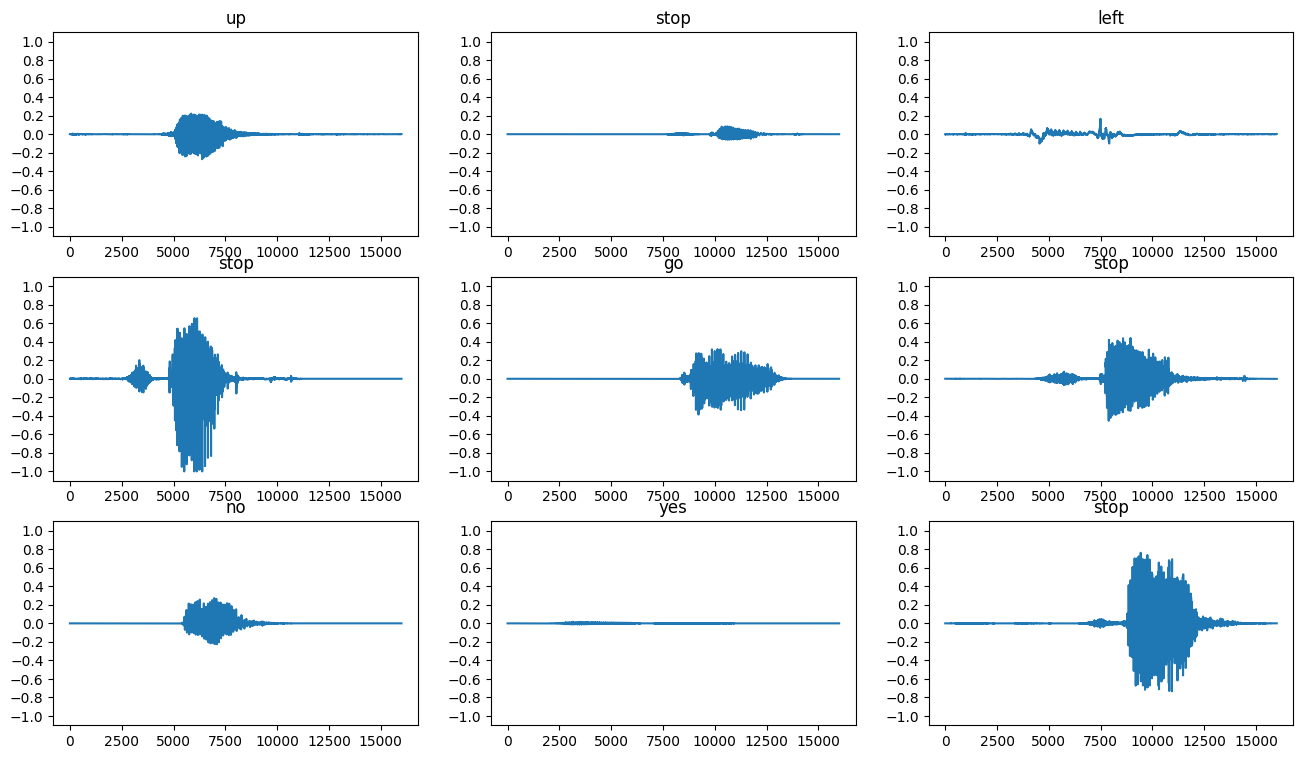

In [14]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
  if i>=n:
    break
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(sample[0][i].numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = foo.label_names[sample[1][i]]
  ax.set_title(label)
  ax.set_ylim([-1.1,1.1])
  

plt.show()

In [15]:
foo.make_spec_ds()
sample2 = foo.get_sectogram_sample(sample_size)

2023-04-24 01:42:07.167604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6401]
	 [[{{node Placeholder/_4}}]]
2023-04-24 01:42:07.168647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6401]
	 [[{{node Placeholder/_4}}]]
2023-04-24 01:42:07.665032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6401]


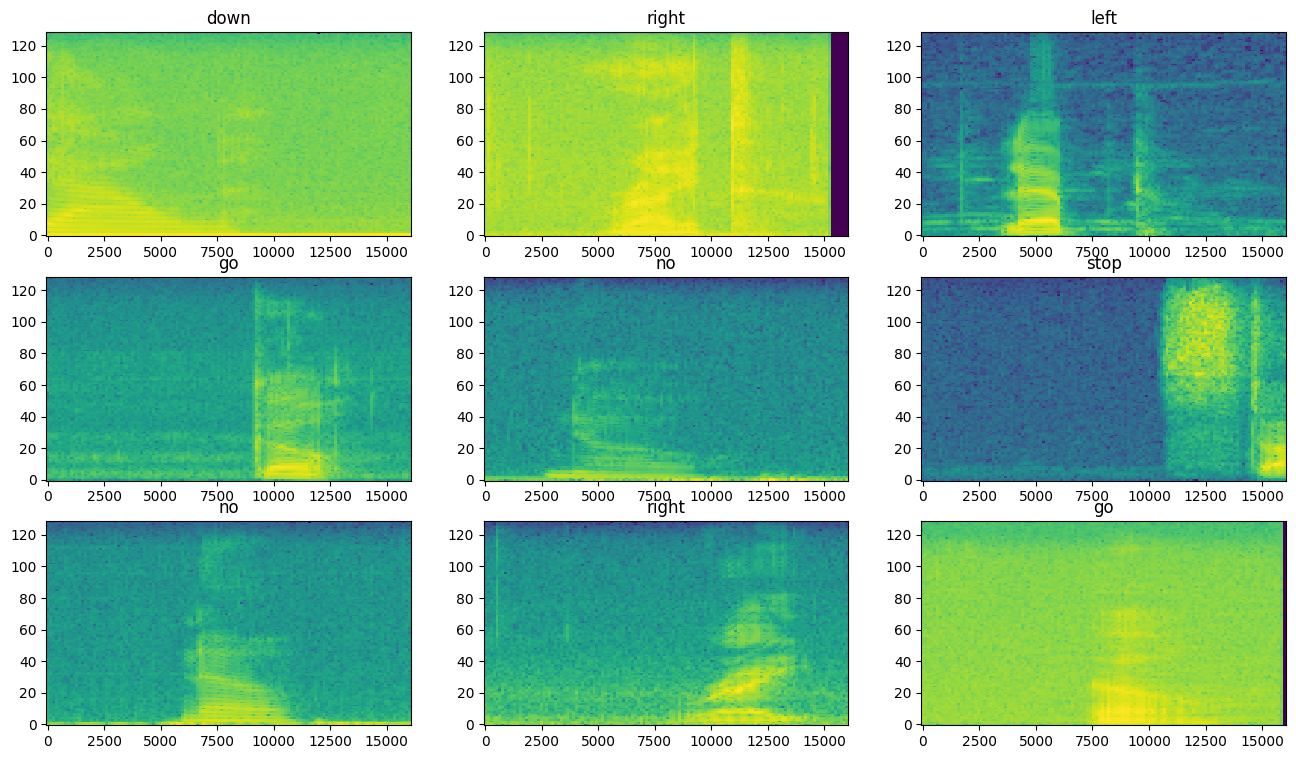

In [16]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(sample2[0][i].numpy(),ax)
    ax.set_title(foo.label_names[sample2[1][i].numpy()])

plt.show()


Label: up
Waveform shape: (16000,)
Audio playback


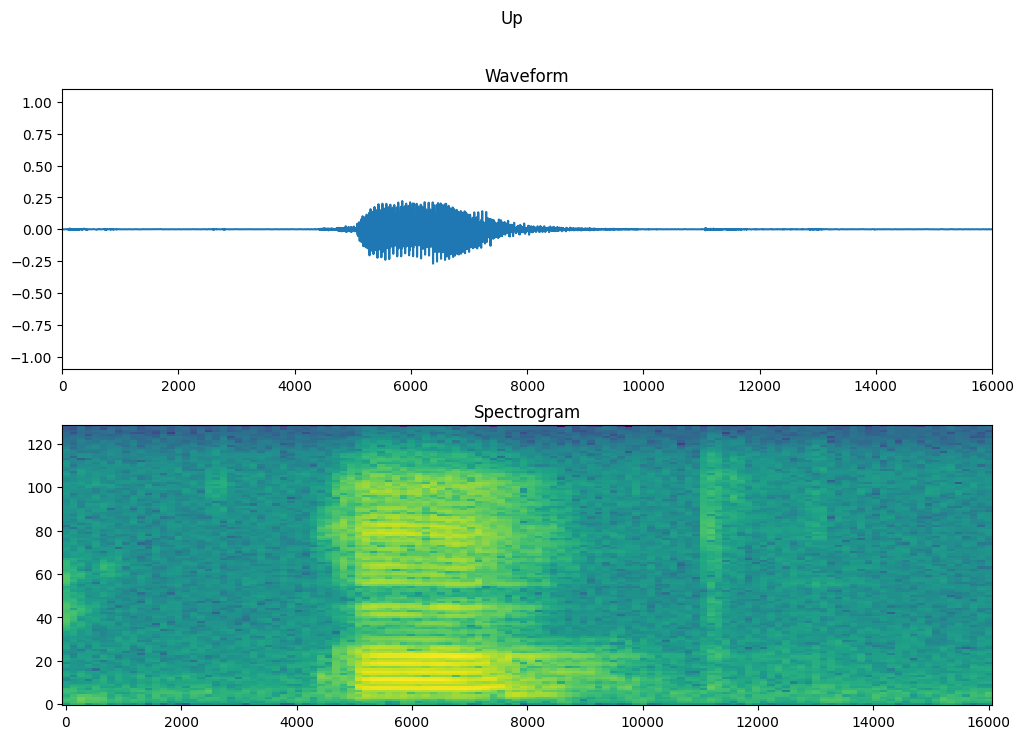

In [17]:
audioplayback(foo.label_names[sample[1][0]],sample[0][0])
spectogram = foo.get_spectrogram(sample[0][0])


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(sample[0][0].shape[0])
axes[0].plot(timescale, sample[0][0].numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
axes[0].set_ylim([-1.1,1.1])

plot_spectrogram(spectogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(foo.label_names[sample[1][0]].title())
plt.show()


In [18]:
from model import *
tst = Model(sample2[0].shape[1:],foo.label_names,foo.train_spectrogram_ds)

2023-04-24 01:42:15.083895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6401]
	 [[{{node Placeholder/_0}}]]
2023-04-24 01:42:15.084712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6401]
	 [[{{node Placeholder/_0}}]]
2023-04-24 01:42:19.265282: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Cannot batch tensors with different shapes in component 0. First

InvalidArgumentError: Graph execution error:

Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/garoupine/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/garoupine/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/garoupine/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/garoupine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_35170/769554277.py", line 2, in <module>
      tst = Model(sample2[0].shape[1:],foo.label_names,foo.train_spectrogram_ds)
    File "/home/garoupine/Desktop/foo/model.py", line 35, in __init__
      self.norm_layer.adapt(data=data.map(map_func=lambda spec, label: spec))
    File "/home/garoupine/.local/lib/python3.8/site-packages/keras/layers/preprocessing/normalization.py", line 286, in adapt
      super().adapt(data, batch_size=batch_size, steps=steps)
    File "/home/garoupine/.local/lib/python3.8/site-packages/keras/engine/base_preprocessing_layer.py", line 258, in adapt
      self._adapt_function(iterator)
    File "/home/garoupine/.local/lib/python3.8/site-packages/keras/engine/base_preprocessing_layer.py", line 121, in adapt_step
      data = next(iterator)
Node: 'IteratorGetNext'
Cannot batch tensors with different shapes in component 0. First element had shape [16000,1] and element 23 had shape [16000,2].
	 [[{{node IteratorGetNext}}]] [Op:__inference_adapt_step_2140]

In [ ]:
tst.verbose()

In [ ]:
tst.compile()
tst.train(foo.train_spectrogram_ds,foo.val_spectrogram_ds,1)

In [ ]:
module_perforamance(tst.gethistory())

In [ ]:
y_pred = tst.predict(foo.test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
module_confusionmatrix(foo.test_spectrogram_ds,y_pred,foo.label_names)

In [ ]:
path = 'data/mini_speech_commands/go/2bd2cad5_nohash_0.wav'

x = foo.encode_audio(path)
command  = get_command(path)
prediction = tst.predict(x[1])
display_predictions(tst.labels,prediction)


print("Input command:",command)
print('predicted command',tst.get_prediction(x[1]))
audioplayback(command,x[0])

In [ ]:
from record import *
record()


In [ ]:
path = 'recorded/recorded_audio.wav'
x = foo.encode_audio(path)
command  = get_command(path)
prediction = tst.predict(x[1])
display_predictions(tst.labels,prediction)


print("Input command:",command)
print('predicted command',tst.get_prediction(x[1]))
audioplayback(command,x[0])